<a href="https://colab.research.google.com/github/therealGARRETTKEYT/CS4410/blob/main/CS4410Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 124s 145ms/step - accuracy: 0.8975 - loss: 0.3240 - val_accuracy: 0.9883 - val_loss: 0.0439
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 150s 154ms/step - accuracy: 0.9874 - loss: 0.0431 - val_accuracy: 0.9895 - val_loss: 0.0387
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 132s 143ms/step - accuracy: 0.9918 - loss: 0.0264 - val_accuracy: 0.9858 - val_loss: 0.0470
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 147s 149ms/step - accuracy: 0.9941 - loss: 0.0186 - val_accuracy: 0.9892 - val_loss: 0.0428
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 139s 145ms/step - accuracy: 0.9958 - loss: 0.0129 - val_accuracy: 0.9890 - val_loss: 0.0373
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9888 - loss: 0.0368
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
0: 0.0000000010%
1: 0.0000000024%
2: 0.0000016636%
3: 0.0000018056%
4: 0.0000000010%
5: 0.0000000009%
6: 0.0000000000%
7: 99.9999821186%
8: 0.0000021767%
9: 0.0000112627%
0: 0.0000180040%
1: 0.0001734468%
2: 0.0000064614%
3: 97

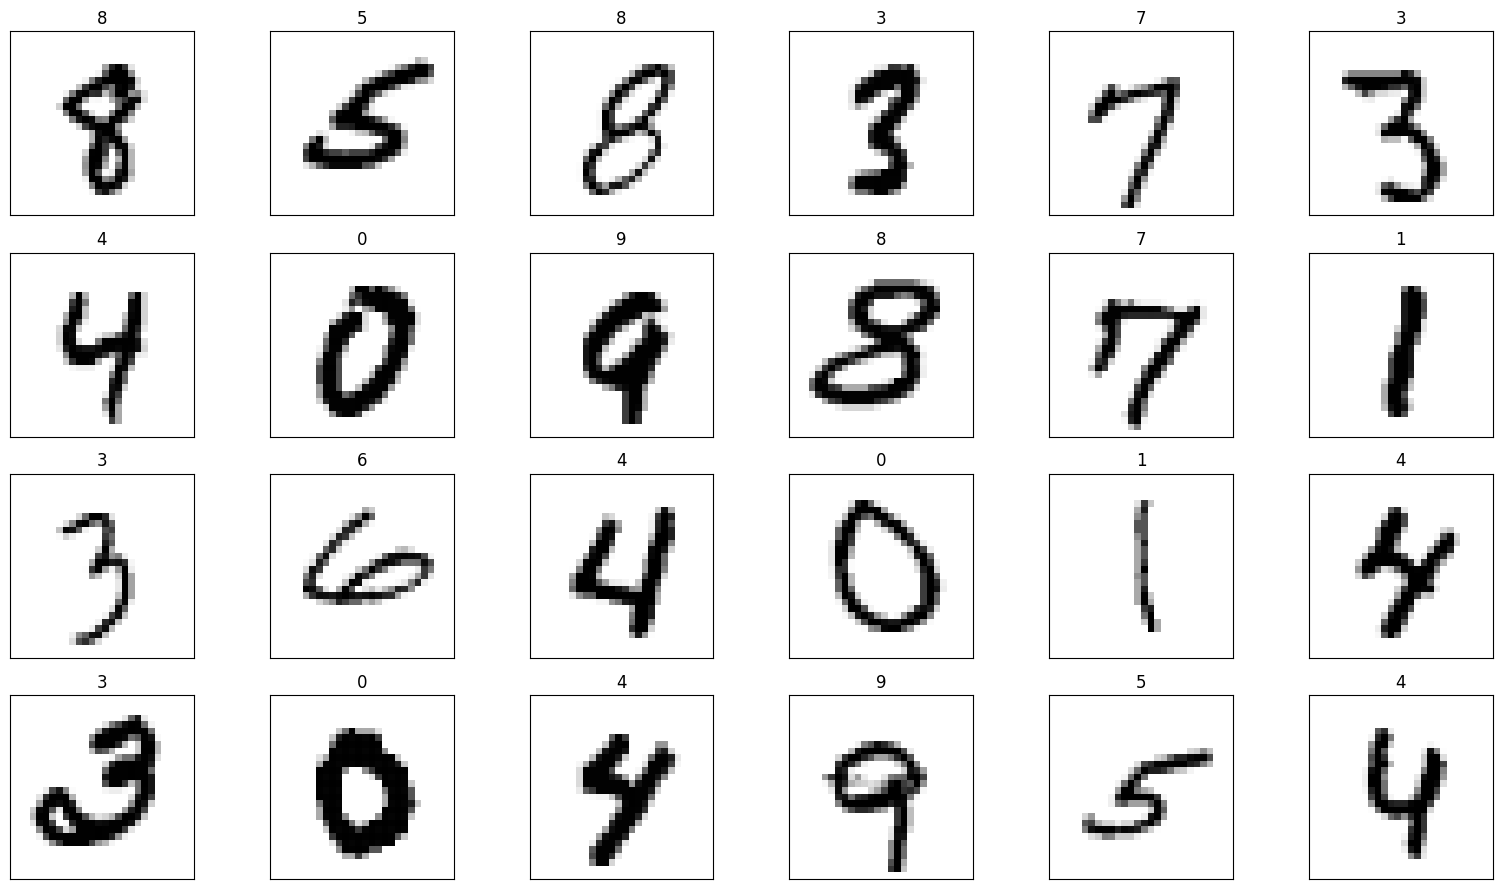

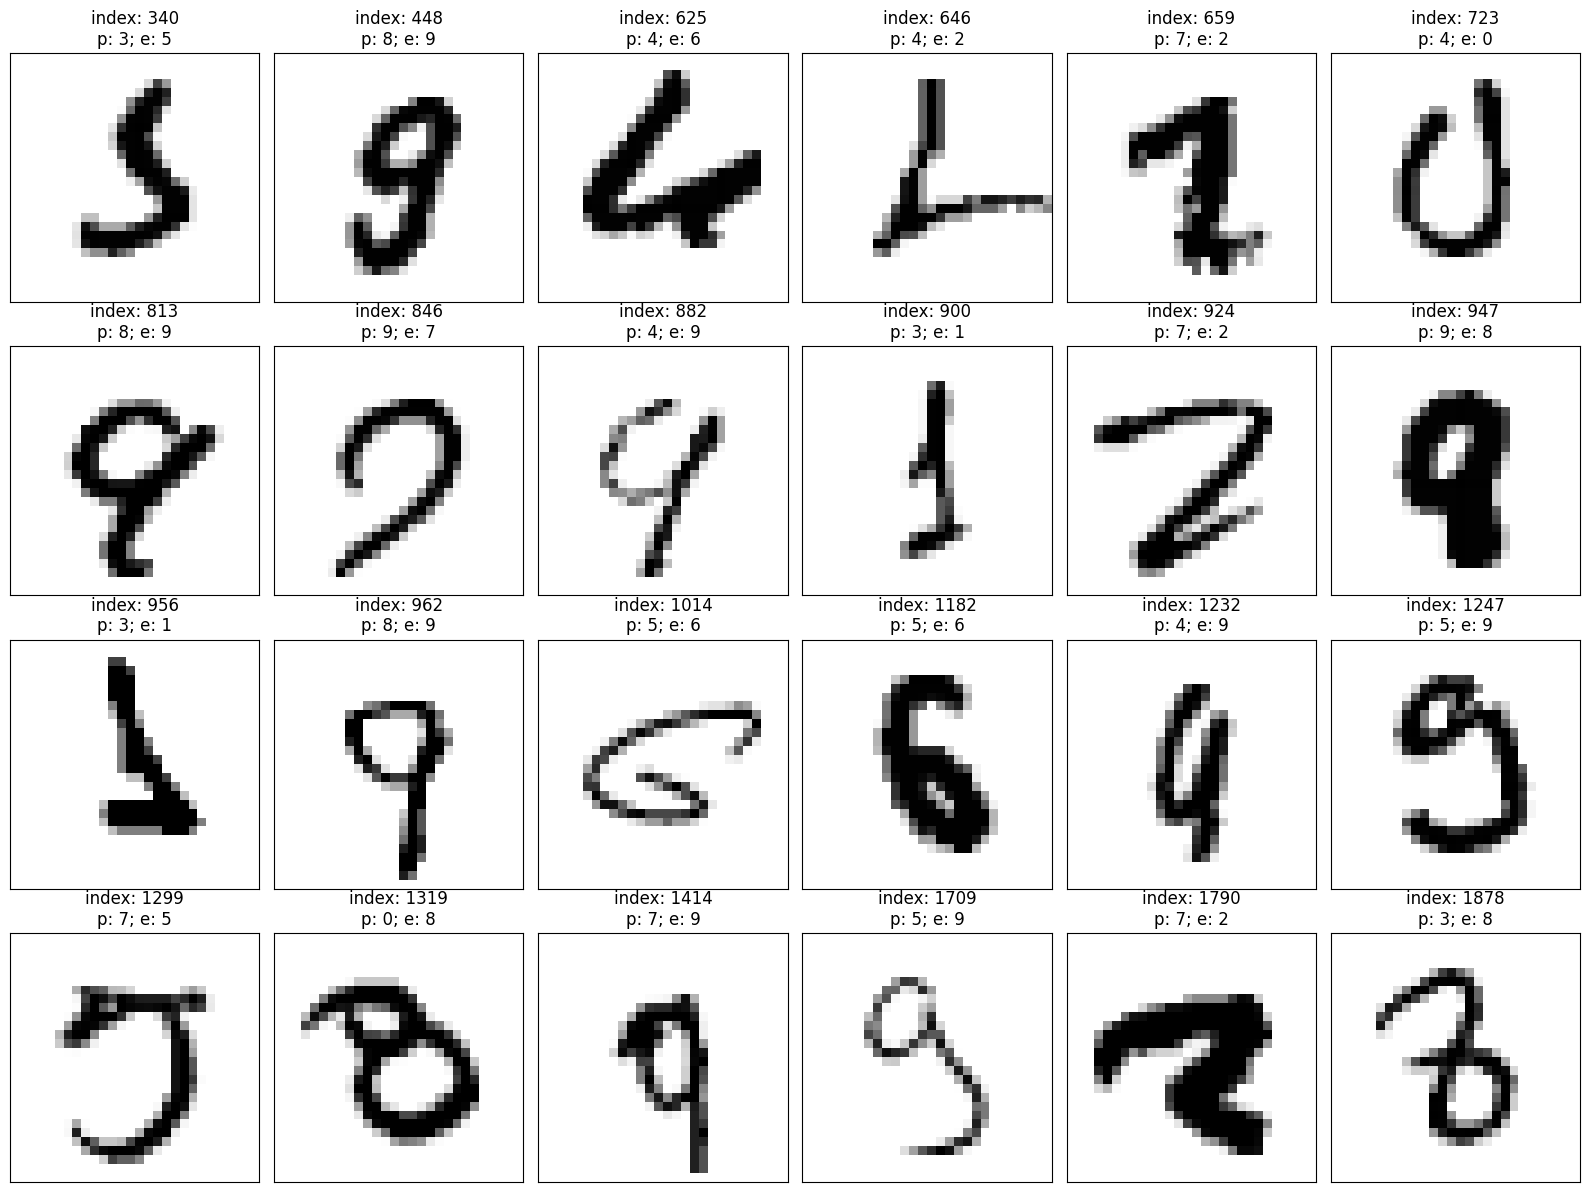

In [22]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
y_train.shape
X_test.shape
y_test.shape
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape
y_train[0]  # one sample’s categorical data
y_test = to_categorical(y_test)
y_test.shape
from tensorflow.keras.models import Sequential
cnn = Sequential()
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))
cnn.summary()

from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)
loss
accuracy
predictions = cnn.predict(X_test)
y_test[0]
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
        len(incorrect_predictions)  # number of incorrect predictions

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

display_probabilities(predictions[340])

display_probabilities(predictions[740])

display_probabilities(predictions[1260])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 127s 149ms/step - accuracy: 0.7642 - loss: 0.6631 - val_accuracy: 0.8712 - val_loss: 0.3336
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 149s 157ms/step - accuracy: 0.8875 - loss: 0.3085 - val_accuracy: 0.8977 - val_loss: 0.2786
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 143s 159ms/step - accuracy: 0.9051 - loss: 0.2589 - val_accuracy: 0.9015 - val_loss: 0.2665
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 138s 154ms/step - accuracy: 0.9181 - loss: 0.2258 - val_accuracy: 0.9115 - val_loss: 0.2535
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 136s 147ms/step - accuracy: 0.9278 - loss: 0.1964 - val_accuracy: 0.9205 - val_loss: 0.2317
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9123 - loss: 0.2555
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
0: 0.0000022096%
1: 0.0000007039%
2: 0.0000267289%
3: 0.0000015109%
4: 0.0000007407%
5: 0.0546625990%
6: 0.0000000893%
7: 0.1068887184%
8: 0.0000913226%
9: 99.8383104801%
0: 0.0140596909%
1: 0.0006542720%
2: 1.7377318814%
3: 0.

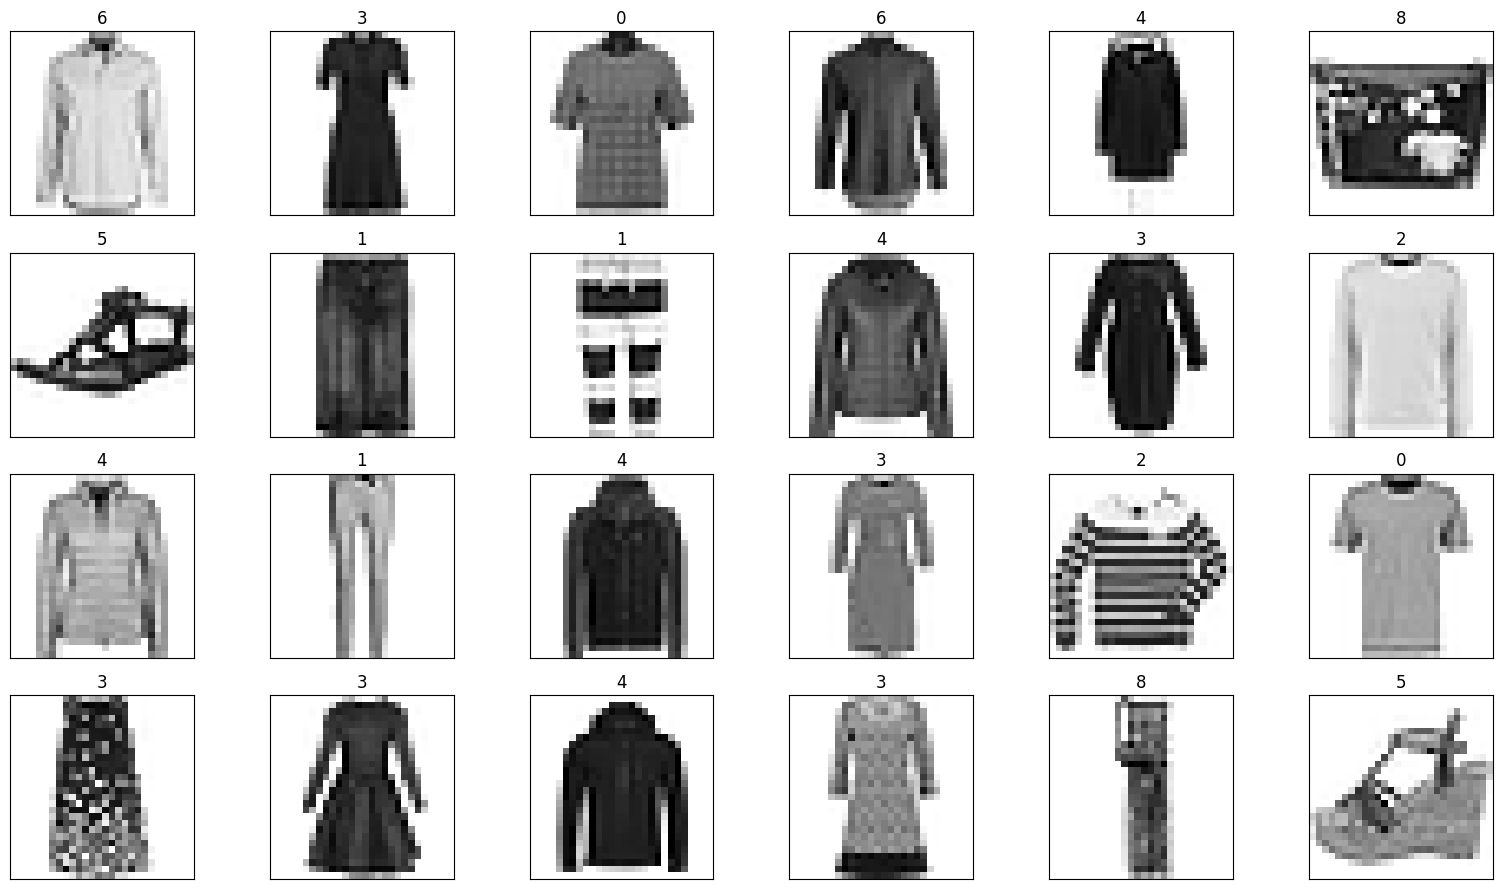

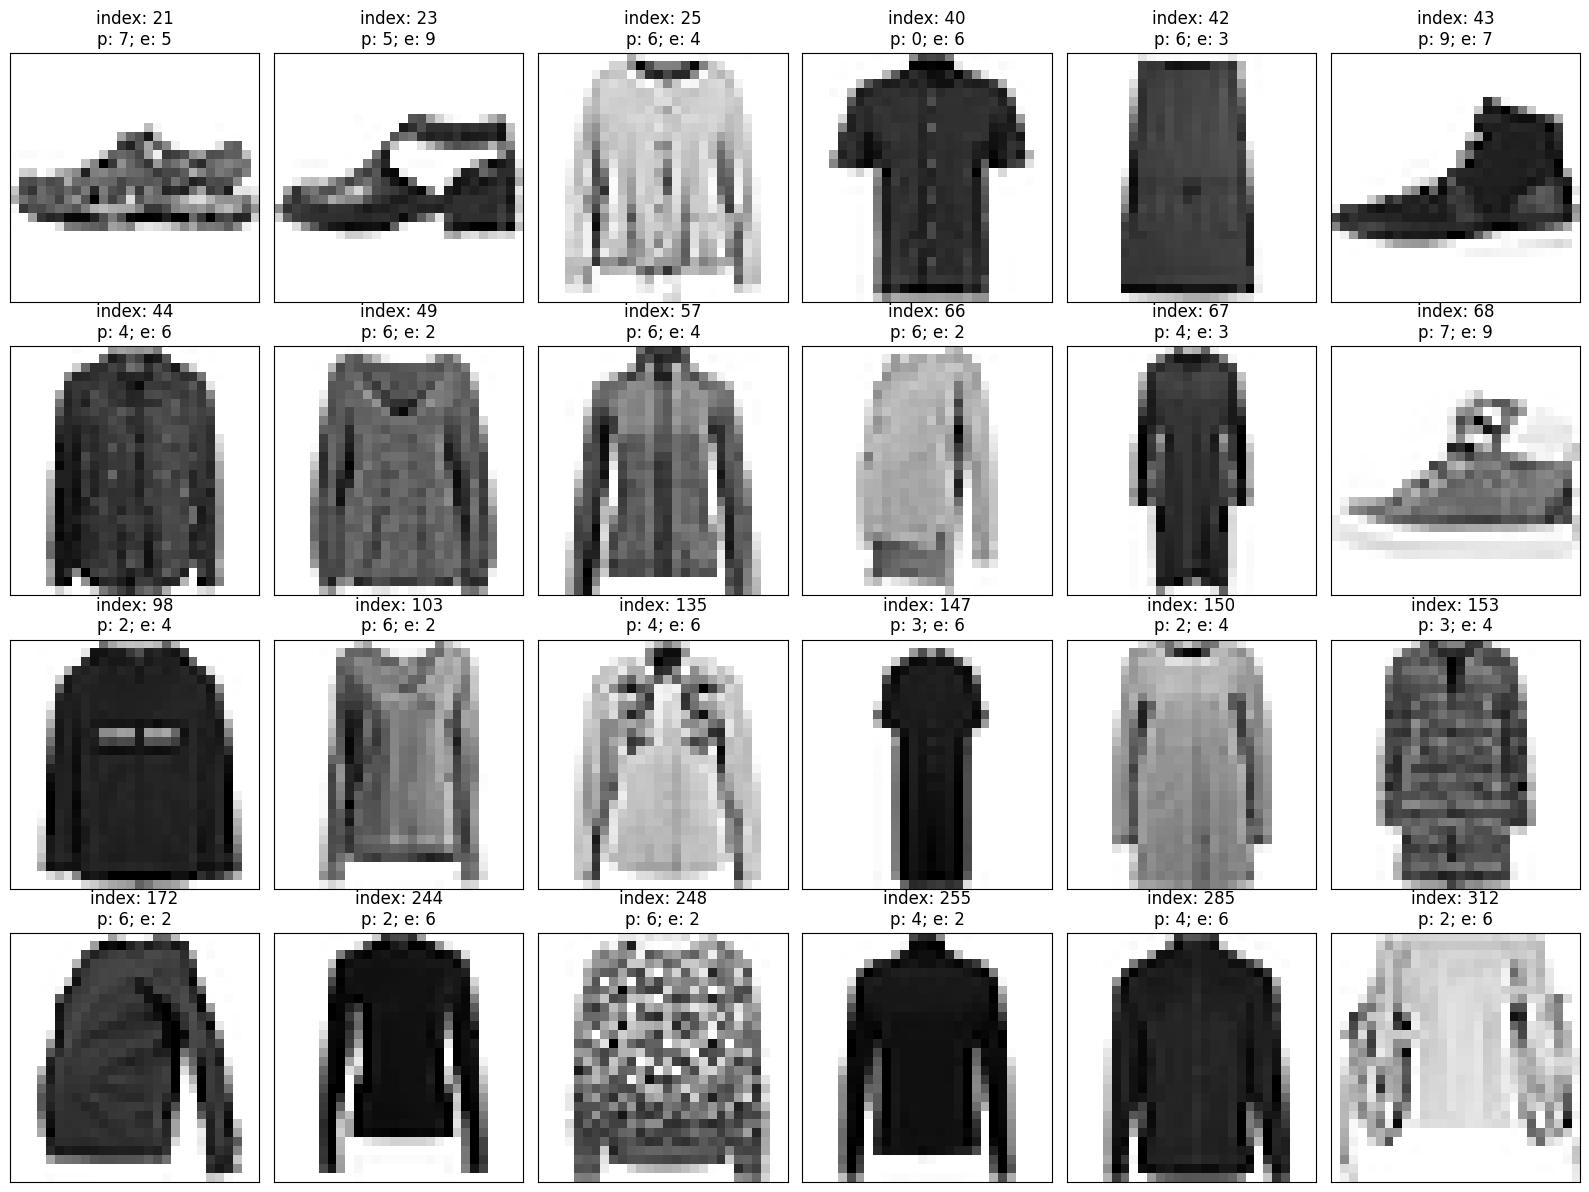

In [27]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape
y_train.shape
X_test.shape
y_test.shape
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape
y_train[0]  # one sample’s categorical data
y_test = to_categorical(y_test)
y_test.shape
from tensorflow.keras.models import Sequential
cnn = Sequential()
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))
cnn.summary()

from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)
loss
accuracy
predictions = cnn.predict(X_test)
y_test[0]
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
        len(incorrect_predictions)  # number of incorrect predictions

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

display_probabilities(predictions[340])

display_probabilities(predictions[740])

display_probabilities(predictions[1260])

# ***QUESTION:***
The accuracy of MNIST is much higher compared to Fashin-MNIST. The training times for MNIST and Fashin-MNIST are very similar and stay within a few seconds for each Epoch.

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4096)                │      13,111,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,711,498 (52.31 MB)

 Trainable params: 13,711,498 (52.31 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 434s 512ms/step - accuracy: 0.9113 - loss: 0.2778 - val_accuracy: 0.9867 - val_loss: 0.0476
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 426s 493ms/step - accuracy: 0.9873 - loss: 0.0399 - val_accuracy: 0.9902 - val_loss: 0.0329
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 439s 490ms/step - accuracy: 0.9929 - loss: 0.0229 - val_accuracy: 0.9912 - val_loss: 0.0366
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 445s 494ms/step - accuracy: 0.9953 - loss: 0.0155 - val_accuracy: 0.9920 - val_loss: 0.0305
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 415s 491ms/step - accuracy: 0.9957 - loss: 0.0136 - val_accuracy: 0.9928 - val_loss: 0.0344
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.9895 - loss: 0.0411
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step
0: 0.0000000000%
1: 0.0000000036%
2: 0.0000000000%
3: 0.0000000025%
4: 0.0000000379%
5: 0.0000000000%
6: 0.0000000000%
7: 99.9999940395%
8: 0.0000000000%
9: 0.0000002208%
0: 0.0000092430%
1: 1.8452916294%
2: 0.0001730689%
3: 

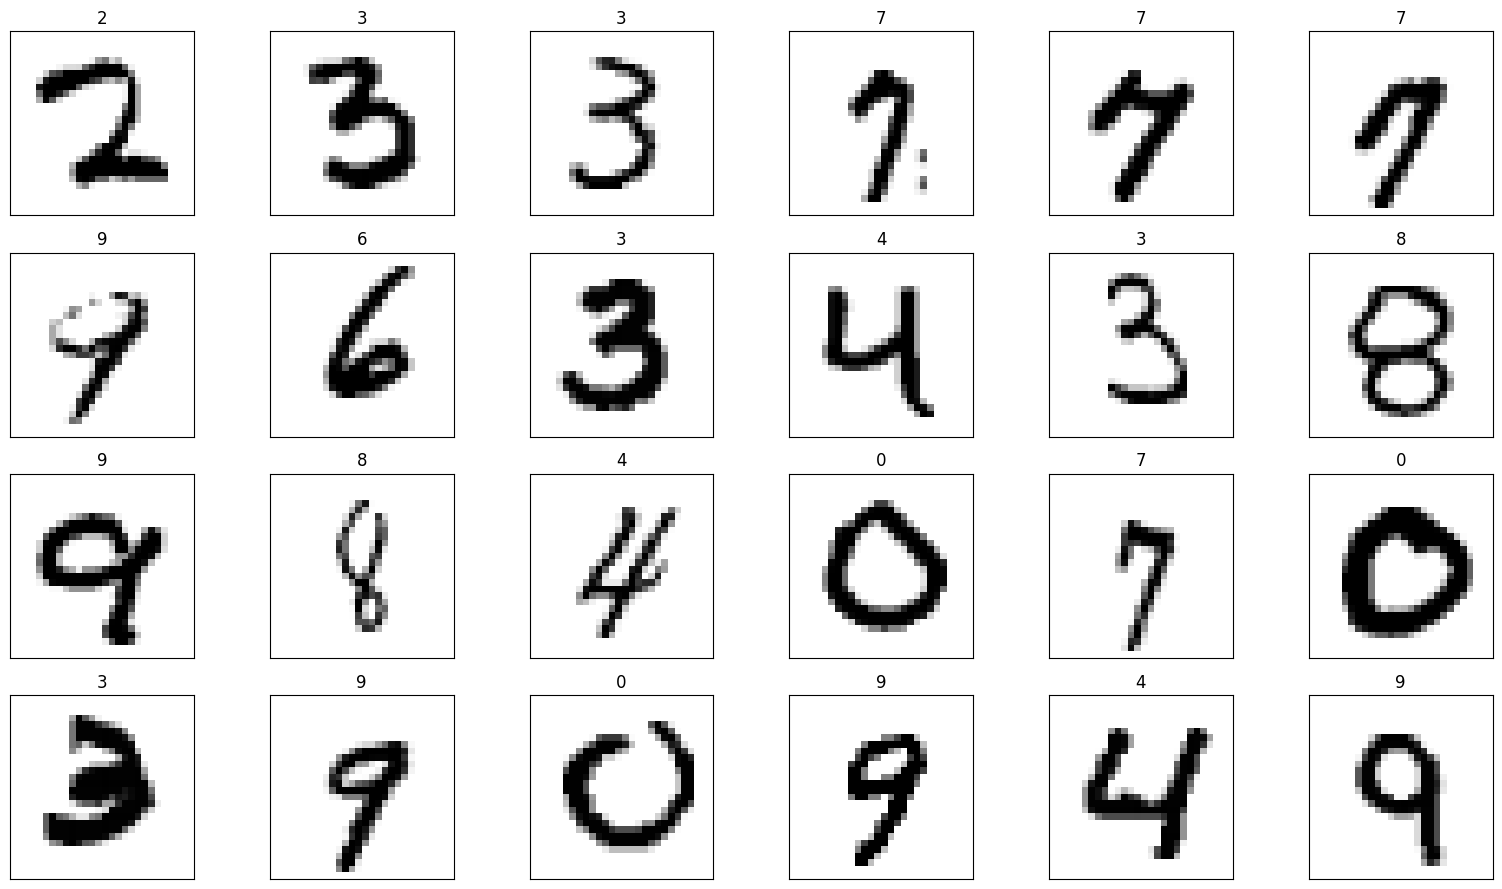

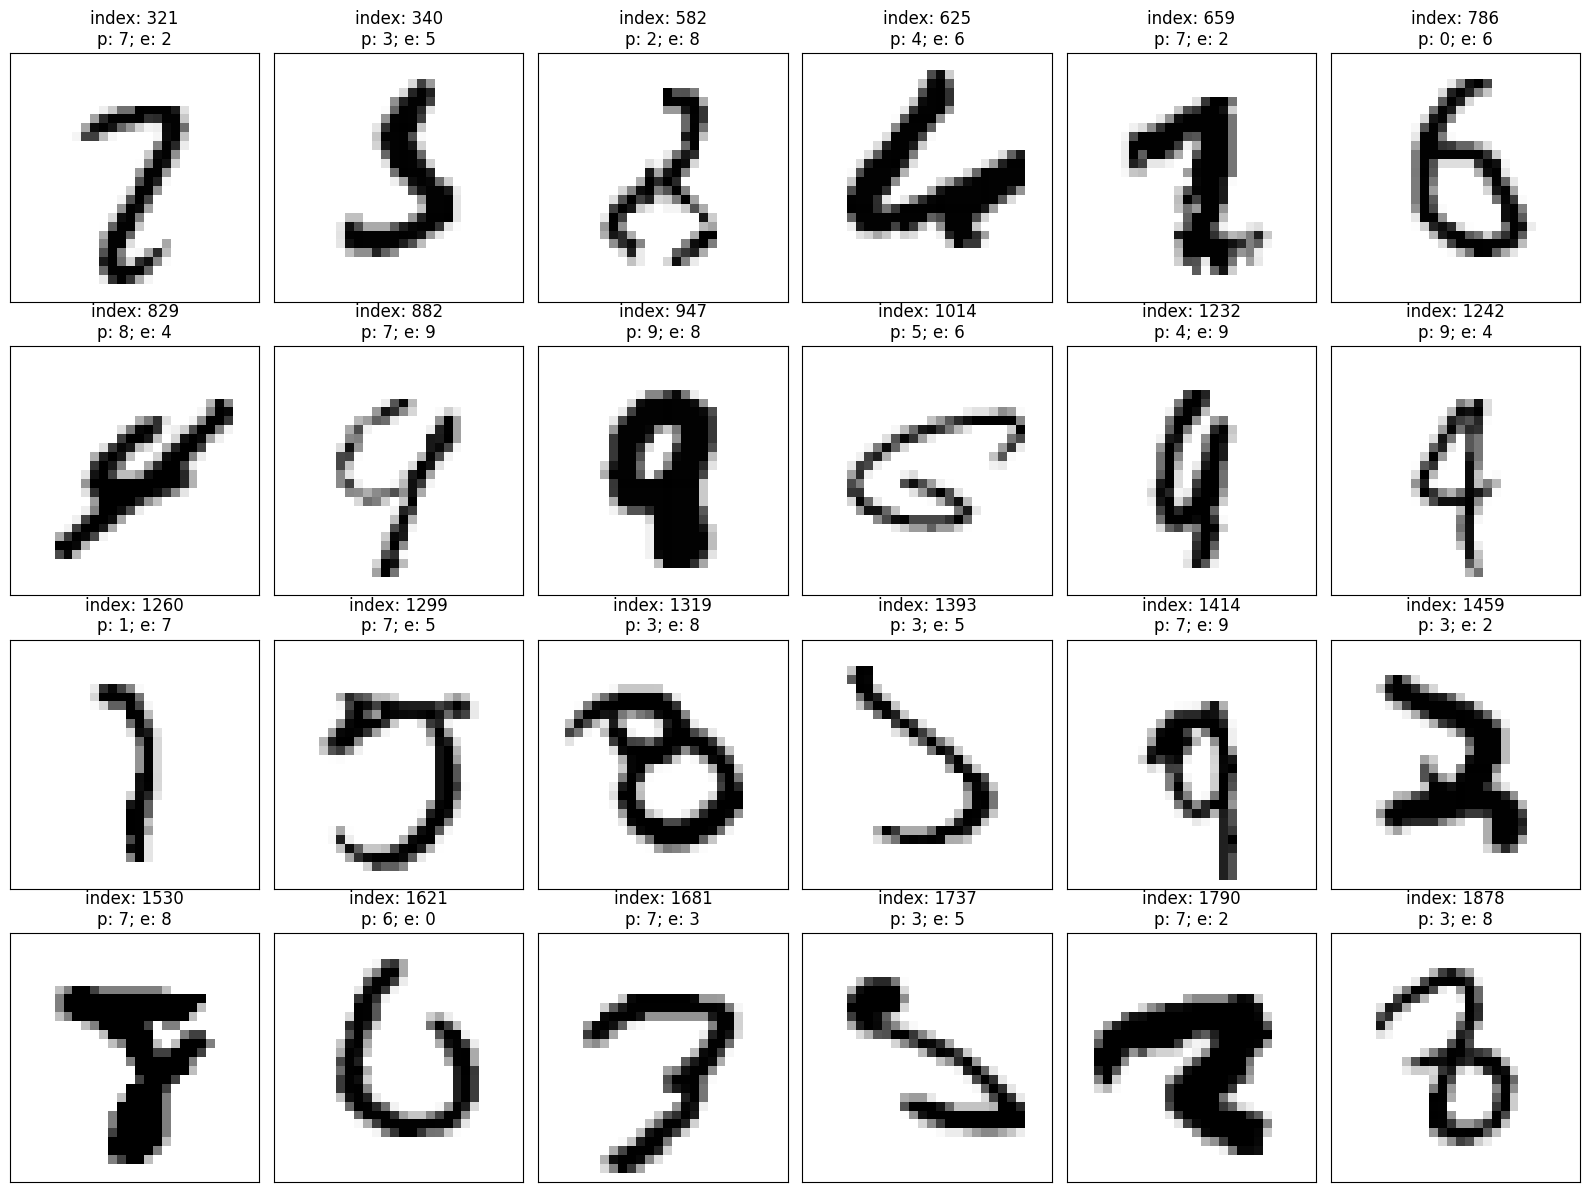

In [28]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
y_train.shape
X_test.shape
y_test.shape
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape
y_train[0]  # one sample’s categorical data
y_test = to_categorical(y_test)
y_test.shape
from tensorflow.keras.models import Sequential
cnn = Sequential()
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=4096, activation='relu'))
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))
cnn.summary()

from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)
loss
accuracy
predictions = cnn.predict(X_test)
y_test[0]
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
        len(incorrect_predictions)  # number of incorrect predictions

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

display_probabilities(predictions[340])

display_probabilities(predictions[740])

display_probabilities(predictions[1260])

# QUESTION:

By adding a dense layer with 4096 neurons the speed became dramatically slower, but the accuracy was slightly better.